# Project on NLP(Natural Language Processing) and Web Scraping

### Extraction

###### Extracting data from urls and saving them into text files

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

titles = []
articles = []

def scrape_title_and_content(url):
  try:
      # Send a GET request to the URL
      response = requests.get(url)

      # Check if the request was successful (status code 200)
      if response.status_code == 200:
          # Parse the HTML content of the page
          soup = BeautifulSoup(response.text, 'html.parser')

          # Find the title
          title = soup.find('h1', class_='entry-title')
          if title:
              #print(f'Title: {title.text.strip()}')
              titles.append(title.text.strip())
          else:
            title = soup.find('h1', class_='tdb-title-text')
            #print(f'Title: {title.text.strip()}')
            titles.append(title.text.strip())
            


          # Find the content
          content = soup.find('div', class_='td-post-content tagdiv-type')  # Adjust the class as needed
          if content:
              #print('Content:')
              #print(content.text.strip())
              articles.append(content.text.strip())
          else:
            content = soup.find('div', class_='td_block_wrap tdb_single_content tdi_130 td-pb-border-top td_block_template_1 td-post-content tagdiv-type')  # Adjust the class as needed
            #print('Content:')
            #print(content.text.strip())
            articles.append(content.text.strip())
          return title.text.strip() if title else None, content.text.strip() if content else None
            
      else:
          print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
  except Exception as e:
        print(f"An error occurred while scraping URL: {url}. Error: {str(e)}")
  return None, None
# Read input Excel file
df = pd.read_excel('Input.xlsx')
print(df.head())

# Loop through each row
for index, row in df.iterrows():
    url_id = row['URL_ID']
    url = row['URL']

    # Check if the URL is valid
    if not pd.isna(url):
        # Scrape title and content
        title, content = scrape_title_and_content(url)

        if title and content:
            # Save the article to a text file
            filename = f'{url_id}.txt'
            with open(filename, 'w', encoding='utf-8') as file:
                file.write(f'Title: {title}\n\n')
                file.write(f'Content: {content}\n\n')
            print(f'Article for {url_id} saved successfully.')

        else:
            print(f'Failed to extract article for {url_id}.')
    else:
        print(f'Invalid URL for {url_id}.')


            URL_ID                                                URL
0  blackassign0001  https://insights.blackcoffer.com/rising-it-cit...
1  blackassign0002  https://insights.blackcoffer.com/rising-it-cit...
2  blackassign0003  https://insights.blackcoffer.com/internet-dema...
3  blackassign0004  https://insights.blackcoffer.com/rise-of-cyber...
4  blackassign0005  https://insights.blackcoffer.com/ott-platform-...
Article for blackassign0001 saved successfully.
Article for blackassign0002 saved successfully.
Article for blackassign0003 saved successfully.
Article for blackassign0004 saved successfully.
Article for blackassign0005 saved successfully.
Article for blackassign0006 saved successfully.
Article for blackassign0007 saved successfully.
Article for blackassign0008 saved successfully.
Article for blackassign0009 saved successfully.
Article for blackassign0010 saved successfully.
Article for blackassign0011 saved successfully.
Article for blackassign0012 saved successfully.
Arti

In [15]:
print(df.head()) # names and urls

            URL_ID                                                URL
0  blackassign0001  https://insights.blackcoffer.com/rising-it-cit...
1  blackassign0002  https://insights.blackcoffer.com/rising-it-cit...
2  blackassign0003  https://insights.blackcoffer.com/internet-dema...
3  blackassign0004  https://insights.blackcoffer.com/rise-of-cyber...
4  blackassign0005  https://insights.blackcoffer.com/ott-platform-...


# Textual Analysis with NLP 

## Finding:
    ** Sentiment Scores
    ** Readability Score
    ** Average Number of Words Per Sentence
    ** Complex Word Count
    ** Word Count
    ** Syllable Count Per Word
    ** Personal Pronouns
    ** Average Word Length
    ** FOG INDEX

In [10]:
import os
from textblob import TextBlob
import nltk
import textstat
import pandas as pd

# Download NLTK stop words list
nltk.download('stopwords')

# Function to load stopwords from multiple text files
def load_stopwords(stopwords_files, encoding='utf-8'):
    custom_stop_words = []
    for file_path in stopwords_files:
        with open(file_path, 'r', encoding=encoding) as file:
            custom_stop_words.extend(file.read().splitlines())
    return custom_stop_words

# Function to clean text using custom stop words
def clean_text(text, custom_stop_words):
    words = text.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in custom_stop_words]
    return ' '.join(cleaned_words)

# Function to load positive and negative words from text files
def load_pos_neg_words(pos_file, neg_file, encoding='utf-8'):
    with open(pos_file, 'r', encoding=encoding) as file:
        positive_words = file.read().splitlines()
    with open(neg_file, 'r', encoding=encoding) as file:
        negative_words = file.read().splitlines()
    return positive_words, negative_words

# Function to create a dictionary of positive and negative words
def create_pos_neg_dict(positive_words, negative_words):
    pos_neg_dict = {}
    for word in positive_words:
        pos_neg_dict[word.lower()] = 'positive'
    for word in negative_words:
        pos_neg_dict[word.lower()] = 'negative'
    return pos_neg_dict

# Function to extract derived variables
# Function to extract derived variables
def extract_derived_variables(text):
    # Create a TextBlob object for the text
    blob = TextBlob(text)

    # Compute sentiment scores
    sentiment_scores = blob.sentiment

    # Analysis of Readability
    readability_score = textstat.flesch_reading_ease(text)

    # Average Number of Words Per Sentence
    avg_words_per_sentence = textstat.lexicon_count(text) / textstat.sentence_count(text)

    # Complex Word Count
    complex_word_count = textstat.difficult_words(text)

    # Word Count
    word_count = textstat.lexicon_count(text)

    # Syllable Count Per Word
    syllables_per_word = textstat.syllable_count(text) / textstat.lexicon_count(text)

    # Personal Pronouns
    personal_pronouns = sum(1 for word in blob.words if word.lower() in ['i', 'me', 'my', 'mine', 'myself'])

    # Average Word Length
    avg_word_length = sum(len(word) for word in blob.words) / len(blob.words)

    # FOG Index
    fog_index = 0.4 * (avg_words_per_sentence + (complex_word_count / word_count))

    derived_variables = {
        'Sentiment Scores': sentiment_scores,
        'Readability Score': readability_score,
        'Average Number of Words Per Sentence': avg_words_per_sentence,
        'Complex Word Count': complex_word_count,
        'Word Count': word_count,
        'Syllable Count Per Word': syllables_per_word,
        'Personal Pronouns': personal_pronouns,
        'Average Word Length': avg_word_length,
        'FOG INDEX': fog_index  # Add FOG index to the derived variables
    }

    return derived_variables

# Specify the path to stopwords files, positive and negative words files
stopwords_files = [
   'StopWords_Names.txt',
    'StopWords_Geographic.txt',
    'StopWords_GenericLong.txt',
    'StopWords_Auditor.txt',
    'StopWords_Currencies.txt',
    'StopWords_GenericLong.txt',
    'StopWords_DatesandNumbers.txt',
]

positive_words_file = 'positive-words.txt'
negative_words_file = 'negative-words.txt'
input_excel_file = 'Input.xlsx'


# Load stopwords, positive words, and negative words
custom_stop_words = load_stopwords(stopwords_files, encoding='latin-1')
positive_words, negative_words = load_pos_neg_words(positive_words_file, negative_words_file, encoding='latin-1')

# Create a dictionary of positive and negative words
pos_neg_dict = create_pos_neg_dict(positive_words, negative_words)
# Create a dictionary of positive and negative words
pos_neg_dict = create_pos_neg_dict(positive_words, negative_words)

# Create a DataFrame to store the derived variables
output_df = pd.DataFrame(columns=[
    'URL_ID',
    'URL',
    'POSITIVE SCORE',
    'NEGATIVE SCORE',
    'POLARITY SCORE',
    'SUBJECTIVITY SCORE',
    'AVG SENTENCE LENGTH',
    'PERCENTAGE OF COMPLEX WORDS',
    'FOG INDEX',
    'AVG NUMBER OF WORDS PER SENTENCE',
    'COMPLEX WORD COUNT',
    'WORD COUNT',
    'SYLLABLE PER WORD',
    'PERSONAL PRONOUNS',
    'AVG WORD LENGTH'
])

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    url_id = row['URL_ID']
    url = row['URL']
    filename = f'{url_id}.txt'

    # Check if the file exists
    if os.path.exists(filename):
        # Read the content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            text_content = file.read()

        # Clean text using custom stop words
        cleaned_text = clean_text(text_content, custom_stop_words)

        # Analyze text and extract derived variables
        derived_variables = extract_derived_variables(cleaned_text)

        # Append the results to the output DataFrame
        output_df = output_df.append({
            'URL_ID': url_id,
            'URL': url,
            'POSITIVE SCORE': derived_variables['Sentiment Scores'][0],  # Assuming Sentiment Scores is a tuple (polarity, subjectivity)
            'NEGATIVE SCORE': derived_variables['Sentiment Scores'][1],  # Assuming Sentiment Scores is a tuple (polarity, subjectivity)
            'POLARITY SCORE': derived_variables['Sentiment Scores'][0],  # Assuming Sentiment Scores is a tuple (polarity, subjectivity)
            'SUBJECTIVITY SCORE': derived_variables['Sentiment Scores'][1],  # Assuming Sentiment Scores is a tuple (polarity, subjectivity)
            'AVG SENTENCE LENGTH': derived_variables['Average Number of Words Per Sentence'],
            'PERCENTAGE OF COMPLEX WORDS': (derived_variables['Complex Word Count'] / derived_variables['Word Count']) * 100,
            'FOG INDEX': derived_variables['FOG INDEX'],  # You need to implement this in the extract_derived_variables function
            'AVG NUMBER OF WORDS PER SENTENCE': derived_variables['Average Number of Words Per Sentence'],
            'COMPLEX WORD COUNT': derived_variables['Complex Word Count'],
            'WORD COUNT': derived_variables['Word Count'],
            'SYLLABLE PER WORD': derived_variables['Syllable Count Per Word'],
            'PERSONAL PRONOUNS': derived_variables['Personal Pronouns'],
            'AVG WORD LENGTH': derived_variables['Average Word Length']
        }, ignore_index=True)

        print(f'Textual analysis for {url_id} completed successfully.')
    else:
        print(f'File {filename} not found for {url_id}.')

# Save the results to an Excel file
output_excel_file = 'Output.xlsx'
output_df.to_excel(output_excel_file, index=False)
print(f'Results saved to {output_excel_file}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ds_remo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Textual analysis for blackassign0001 completed successfully.
Textual analysis for blackassign0002 completed successfully.
Textual analysis for blackassign0003 completed successfully.
Textual analysis for blackassign0004 completed successfully.
Textual analysis for blackassign0005 completed successfully.
Textual analysis for blackassign0006 completed successfully.
Textual analysis for blackassign0007 completed successfully.
Textual analysis for blackassign0008 completed successfully.
Textual analysis for blackassign0009 completed successfully.
Textual analysis for blackassign0010 completed successfully.
Textual analysis for blackassign0011 completed successfully.
Textual analysis for blackassign0012 completed successfully.
Textual analysis for blackassign0013 completed successfully.
Textual analysis for blackassign0014 completed successfully.
Textual analysis for blackassign0015 completed successfully.
Textual analysis for blackassign0016 completed successfully.
Textual analysis for bla

Example of positive words:  ['a+', 'abound', 'abounds', 'abundance', 'abundant']
Example of negative words:  ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


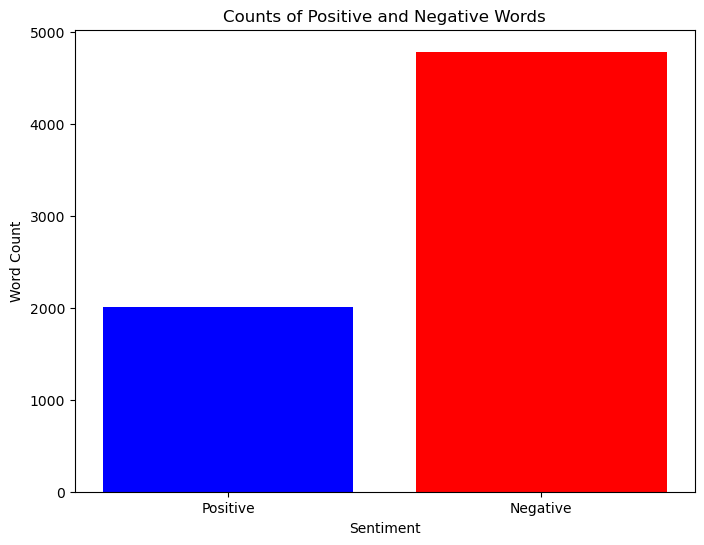

In [21]:
import matplotlib.pyplot as plt

# Count positive and negative words
print("Example of positive words: ",positive_words[:5])
print("Example of negative words: ",negative_words[:5])
positive_count = len(positive_words)
negative_count = len(negative_words)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['blue', 'red'])
plt.title('Counts of Positive and Negative Words')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


# Final Result Output

In [11]:
output_df.head()

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,0.234992,0.590911,0.234992,0.590911,7.723684,23.339012,3.182830,7.723684,137,587,1.950596,0,6.459322
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,0.086537,0.435965,0.086537,0.435965,9.951220,40.441176,4.142253,9.951220,330,816,2.278186,0,7.194313
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,0.066005,0.397024,0.066005,0.397024,11.245614,40.249610,4.659244,11.245614,258,641,2.655226,0,8.159754
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,0.004972,0.379841,0.004972,0.379841,12.000000,48.557692,4.994231,12.000000,303,624,2.543269,0,7.921136
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,0.095455,0.519893,0.095455,0.519893,9.317073,45.287958,3.907981,9.317073,173,382,2.230366,0,7.421189
